<a href="https://colab.research.google.com/github/duridudu/dupository/blob/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0chpt2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data=np.column_stack((fish_length, fish_weight)) #column_stack:두 배열 한개씩 짝지어서 배열 만들어 
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [3]:
fish_target=np.concatenate((np.ones(35), np.zeros(14))) #concatenate:가로 순으로 이어서 배열 만들어 줌
#알아서 트레이닝셋이랑 훈련셋을 만들어줌(랜덤으로 섞어주기까지..)
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(fish_data,fish_target, stratify=fish_target, random_state=42)
#fish 데이터랑 타겟을 각각 트레이닝셋과 훈련셋으로 나눠줌. (랜덤으로) stratify는 훈련데이터의 비율 지정.(fish_data 비율에 맞춰서)
print(test_target) #이제 비율이 비슷해짐

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


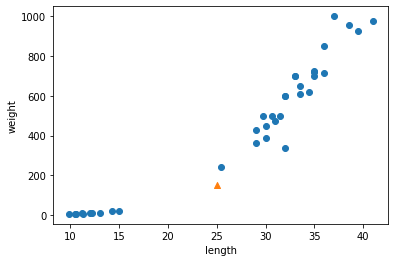

In [10]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input, train_target) #k최근접 이웃으로 훈련. 
kn.score(test_input, test_target)

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1]) #왼쪽거 한 줄(length), 오른쪽거 한 줄(weight)을 그릴 것 [-,-]여기에서
plt.scatter(25,150,marker='^') 
plt.xlabel('length')
plt.ylabel('weight')
plt.show() #25,150은 도미랑 가까운데 왜 빙어에 가깝다고 판단한것?-->응 착시현상~ *길이와 무게의 sclae이 달라서 달라보임
##데이터전처리로 두 데이터의 스케일을 동일하게 맞춰줘야함
#표준점수=(원본데이터-평균)/표준편차

Text(0, 0.5, 'weight')

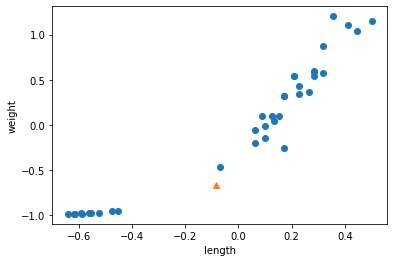

In [13]:
mean=np.mean(train_input, axis=0)
std=np.mean(train_input, axis=0) #행을 따라 각 열의 통계값을 계산함
train_scaled=(train_input-mean)/std
new=([25,150]-mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:,1]) #왼쪽거 한 줄(length), 오른쪽거 한 줄(weight)을 그릴 것 [-,-]여기에서
plt.scatter(new[0],new[1],marker='^') 
plt.xlabel('length')
plt.ylabel('weight')

In [15]:
kn.fit(train_scaled, train_target)
test_scaled=(test_input-mean)/std
kn.score(test_scaled, test_target)

1.0

In [16]:
print(kn.predict([new]))

[1.]


Text(0, 0.5, 'weight')

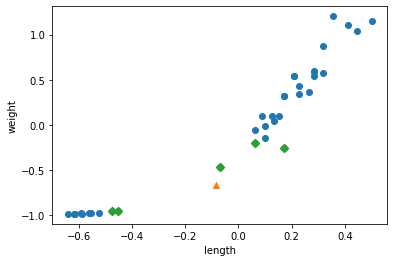

In [20]:
distances, indexes=kn.kneighbors([new]) 
plt.scatter(train_scaled[:,0], train_scaled[:,1]) #왼쪽거 한 줄(length), 오른쪽거 한 줄(weight)을 그릴 것 [-,-]여기에서
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight') #가까운 5개 쌍까지 출력 오나료

# <스케일이 다른 특성 처리>
1.특성을 표준점수로 변환 : 표준점수=(원본데이터-평균)/표준편차
2.훈련셋을 변환한 방식 그대로 텍스트셋을 변환해야 함!